<div>
<img src=attachment:7d08e1e4-817b-4c77-823b-892f1a3c6c76.png width="750"/>
</div>
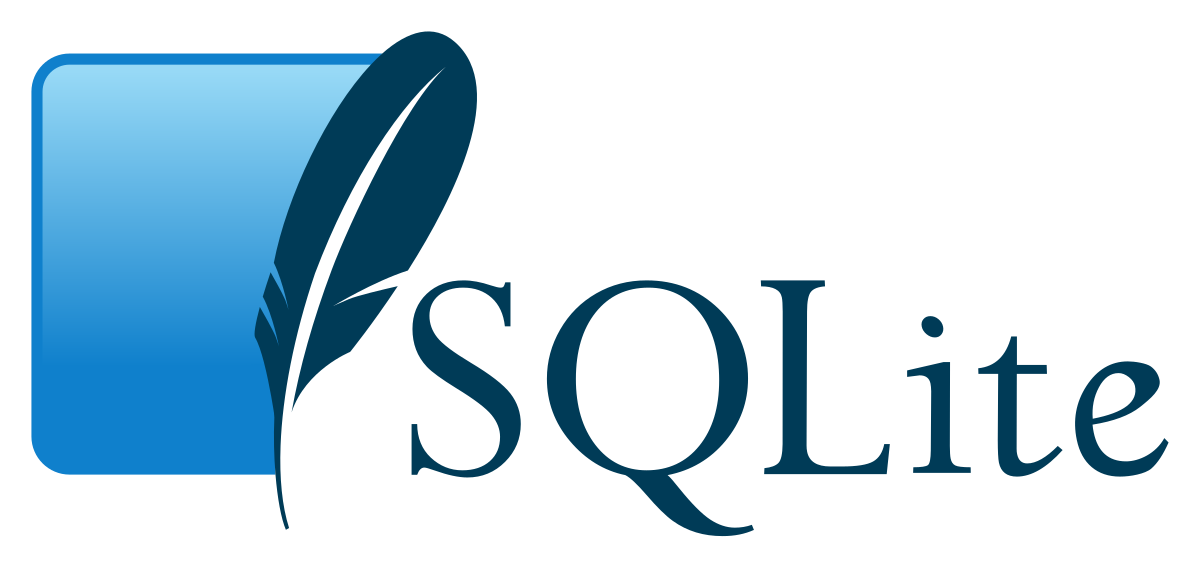

#### Passo 1: Instalar bibliotecas

In [3]:
#!pip install sqlite3 

#### Passo 2: Importar bibliotecas

In [1]:
import sqlite3

import pandas as pd

#### Passo 3: Amostra de dados de entrada

In [2]:
data = {
    'titulo': ['Notebook Dell', 'Smartphone Samsung', 'Livro Python', 'Monitor LG'],
    'preco': [3500, 2100, 89.90, 899],
    'categoria': ['Eletrônicos','Eletrônicos', 'Livros', 'Eletrônicos']
}

df = pd.DataFrame(data)

df

,titulo,preco,categoria
0,Notebook Dell,3500.0,Eletrônicos
1,Smartphone Samsung,2100.0,Eletrônicos
2,Livro Python,89.9,Livros
3,Monitor LG,899.0,Eletrônicos


#### Passo 4: Conexão com banco SQLite

In [3]:
# .connect('name.db') faz a conexão com o banco SQLite (cria o arquivo se não existir )

conn = sqlite3.connect('produtos.db')

A classe Cursor é uma instância com a qual você pode invocar métodos que executam instruções SQLite e buscam dados dos conjuntos de resultados das consultas. Você pode criar um objeto Cursor usando o método cursor() do objeto/classe Connection.

In [4]:
#cirar objeto cursor

cursor = conn.cursor()

#### Passo 5: Criando tabela

Nesta etapa utilizaremos a sintaxe: `cursor.execute(""" ... """)`

- O cursor é quem envia comandos SQL para o banco.
- O método execute() executa o SQL que está entre aspas triplas """ ... """.
- Usamos aspas triplas para poder escrever o comando em várias linhas, deixando mais organizado.

In [5]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS produtos (
    id INTEGER PRIMARY KEY AUTOINCREMENT, 
    titulo TEXT NOT NULL,
    preco REAL NOT NULL, 
    categoria TEXT NOT NULL
);
""")

### Vamos entender cada comando que foi utilizado aqui:

1) `CREATE TABLE IF NOT EXISTS produtos`
- `CREATE TABLE`  cria uma nova tabela no banco.
- `IF NOT EXISTS`  evita erro caso a tabela já exista (sem isso, o comando falharia).
- `produtos`  é o nome da tabela.

2) `id INTEGER PRIMARY KEY AUTOINCREMENT,`
- `id`  nome da coluna.
- `INTEGER`  tipo de dado (número inteiro).
- `PRIMARY KEY`  define que essa coluna é a chave primária da tabela (identificador único de cada linha).
- `AUTOINCREMENT`  cada novo registro recebe automaticamente um valor de ID (1, 2, 3, …).

3) `titulo TEXT NOT NULL,`
- `titulo` → nome da coluna.
- `TEXT` → tipo de dado (texto de tamanho variável).
- `NOT NULL` → esse campo não pode ficar vazio

4) `preco REAL NOT NULL,`
- `preco` nome da coluna.
- `REAL` tipo de dado para números decimais (preço pode ter vírgula/ponto).
- `NOT NULL` não pode ficar em branco.

5) `categoria TEXT NOT NULL`
- `categoria` → nome da coluna.
- `TEXT` → tipo de dado (texto).
- `NOT NULL` → obrigatório.

#### Passo 6: Inserindo dados do DataFrame no banco

In [6]:
for _, row in df.iterrows():
    cursor.execute("INSERT INTO produtos (titulo, preco, categoria) VALUES (?,?,?)", (row["titulo"], row["preco"], row["categoria"]))

conn.commit() #commit da transação é o comando que salva as alterações no banco de dados

print("Dados inseridos com sucesso!")
    

Dados inseridos com sucesso!


### Novamente, vamos entender cada comando
1) `for _, row in df.iterrows():`
- O método `iterrows()` do **Pandas** serve para **percorrer um DataFrame linha por linha**
- Esse método devolve, a cada iteração, um **par** (índice, linha):
- Usando `for _, row` é possível ignorar o índice substituindo o nome da variável por `_`
    - `index, row`  pegaria os dois.
    - `_, row` ignora o índice e pega só a linha

2) `INSERT INTO produtos (titulo, preco, categoria) VALUES (?, ?, ?)", (row["titulo"], row["preco"], row["categoria"])`
- Esse comando SQL insere uma nova linha na tabela produtos
- `INSERT INTO produtos (titulo, preco, categoria)` indica em quais colunas você vai inserir dados.`
- `VALUES (?, ?, ?)`  são **placeholders** (marcadores) para os valores reais.
    - `?` significa "substitua aqui por um valor passado no Python".
- `(row["titulo"], row["preco"], row["categoria"])` é uma tupla com os valores da linha do DataFrame que vão substituir os `?`

#### Passo 7: Consulta SQL

##### Ex 1: Selecionar produtos abaixo de 1000 reais

In [7]:
for row in cursor.execute("SELECT * FROM produtos WHERE preco < 1000; "):
    print(row)

(3, 'Livro Python', 89.9, 'Livros')
(4, 'Monitor LG', 899.0, 'Eletrônicos')
(7, 'Livro Python', 89.9, 'Livros')
(8, 'Monitor LG', 899.0, 'Eletrônicos')


- `SELECT *`  busca todas as colunas da tabela.
- `FROM produtos` consulta a tabela produtos.
- `WHERE preco < 1000` aplica um filtro: só traz os produtos cujo preço seja menor que 1000.

##### Ex 2: Top 2 produtos mais caros

In [8]:
for row in cursor.execute("SELECT titulo, preco FROM produtos ORDER BY preco DESC LIMIT 2"):
    print(row)

('Notebook Dell', 3500.0)
('Notebook Dell', 3500.0)


1) `SELECT titulo, preco` Pede ao banco apenas as colunas titulo e preco (não traz todas as colunas como no `*`
2) `ORDER BY preco DESC` Ordena os resultados pelo preço (preco) em ordem decrescente (DESC) - (ASC seria crescente, padrão do SQL)
3) `LIMIT 2` Limita o número de registros retornados a 2 linhas apenas

##### Ex 3: Contagem por categorias

In [9]:
for row in cursor.execute("SELECT categoria, COUNT(*) FROM produtos GROUP BY categoria"):
    print(row)

('Eletrônicos', 6)
('Livros', 2)


1) `SELECT categoria` Seleciona a coluna "categoria"
2) `COUNT(*)` Conta o número de registros
3) `FROM produtos` Da tabela "produtos"
4) `GROUP BY categoria` Agrupa os resultados por categoria

#### Passo 8: Encerra conexão com banco de dados

In [ ]:
conn.close()